# Heart Disease Predication Model using Machine learning

- Instructor :AbdulRahman Safi
- Student Saeedullah Sabawoon
- Email : Sayedullah411@gmail.com



# Introduction 
> Heart disease is one of the most critical and dangerous illnesses nowadays worldwide, with many people suffering from this disease. To address this issue, we propose to develop a machine learning model that is capable of predicting heart disease based on patient data. This model will help people easily predict their disease. To develop this model, we will use different machine learning algorithms such as logistic regression, decision trees, random forest, Artificial Neural Networks, Support Vector Machines, Decision Tree classifier, K-Nearest Neighbors, and we will also use the python and related libraries to train the model effectively. The model will provide a more efficient, faster, and less expensive solution for diagnosing heart disease.


### Note: The complete documentation will be provided in the PDF file.

#### 1. Import the important Python libraries 

In [42]:
import warnings

# Filter out UserWarning
warnings.filterwarnings("ignore")
import numpy as np  # Importing the numpy library for numerical computations
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
from sklearn import *  # Importing the scikit-learn library for machine learning algorithms
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # For creating a logistic regression model
from sklearn.metrics import accuracy_score  # For evaluating the accuracy of the model predictions
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# 2. Purpose or Problem to Train model 

> To train Machine learning model that can accurately predict the likelihood of a person having heart disease based on their relevant medical attributes or features. with some traing and testing data set

# 3. Data Collection or Data set Selection

> As we want to train a model to solve the problem of heart disease prediction, it is necessary to have a dataset. Ideally, we should collect the data ourselves, but for this heart disease prediction task, we will use a pre-existing dataset. I have downloaded this dataset from the provided link.<br>
Data Set Source : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/download?datasetVersionNumber=2

In [5]:
# Data set importing 
df = pd.read_csv('heart.csv')

### Featuer of the data set

In [6]:
# 1- age                                                            
# 2- sex                                                            
# 3- chest pain type (4 values)                                     
# 4- resting blood pressure                                         
# 5- serum cholestoral in mg/dl                                     
# 6- fasting blood sugar > 120 mg/dl                                
# 7- resting electrocardiographic results (values 0,1,2)            
# 8- maximum heart rate achieved                                    
# 9- exercise induced angina                                        
# 10- oldpeak = ST depression induced by exercise relative to rest  
# 11- the slope of the peak exercise ST segment                     
# 12- number of major vessels (0-3) colored by flourosopy           
# 13- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect     


# 4. Info About the data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 112.2+ KB


In [8]:
df
#it has the 1025 rows × 14 columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,2,2,3,No
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,3,No
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,3,No
3,61,Male,0,148,203,0,1,161,No,0.0,2,1,3,No
4,62,Female,0,138,294,1,1,106,No,1.9,1,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,1,140,221,0,1,164,Yes,0.0,2,0,2,Yes
1021,60,Male,0,125,258,0,0,141,Yes,2.8,1,1,3,No
1022,47,Male,0,110,275,0,0,118,Yes,1.0,1,1,2,No
1023,50,Female,0,110,254,0,0,159,No,0.0,2,0,2,Yes


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,2,2,3,No
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,3,No
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,3,No
3,61,Male,0,148,203,0,1,161,No,0.0,2,1,3,No
4,62,Female,0,138,294,1,1,106,No,1.9,1,3,2,No


In [10]:
print(f"Total row: {len(df)}")

Total row: 1025


In [11]:
print(f"Total row: {len(df.columns)}")

Total row: 14


In [12]:
#Data Description 
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,1.071512,1.385366,0.754146,2.323902
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


# 5. Pre-Proccessing of Data
> During the preprocessing of the data, it is essential to carefully examine the dataset to prepare it for model training.
Step 1: Check for Missing Values
The first step involves identifying and handling any missing values in the dataset. This ensures that the data is clean and ready for the subsequent stages of model training.


### 5.1 : Checkig for  Missing Value 

In [13]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 5.2 : Replacing Some Cols value with Numberic format  to prepare for the Model

In [14]:
# Replaceing the sex cols value Male = 1 and Female = 0
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,No,1.0,2,2,3,No
1,53,1,0,140,203,1,0,155,Yes,3.1,0,0,3,No
2,70,1,0,145,174,0,1,125,Yes,2.6,0,0,3,No
3,61,1,0,148,203,0,1,161,No,0.0,2,1,3,No
4,62,0,0,138,294,1,1,106,No,1.9,1,3,2,No


In [16]:
#Replace the exang or exercise cols value Yes = 1 and No = 0 
df['exang'] = df['exang'].replace({'Yes': 1, 'No': 0})

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No


In [18]:
# Let's convert the target column to numerical format. For example, if the column has values 'Yes' and 'No',
# we can represent 'Yes' as 1 and 'No' as 0.
df['target'] = df['target'].replace({'Yes':1 , 'No': 0})

In [19]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Checking the Distribution of target Variable

In [20]:
# Checking the'Target' column contains values where 1 represents patients with heart disease
num_patients_with_heart_disease = (df['target'] == 1).sum()
num_patients_withno_heart_disease = (df['target'] == 0).sum()
print(f"Number of patients with heart disease: {num_patients_with_heart_disease}")
print(f"Number of patients with heart disease: {num_patients_withno_heart_disease}")
print(f"Total number of patiens : {str(len(df))}")


Number of patients with heart disease: 526
Number of patients with heart disease: 499
Total number of patiens : 1025


In [21]:
#another way for this to check how many we have the zero or one
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

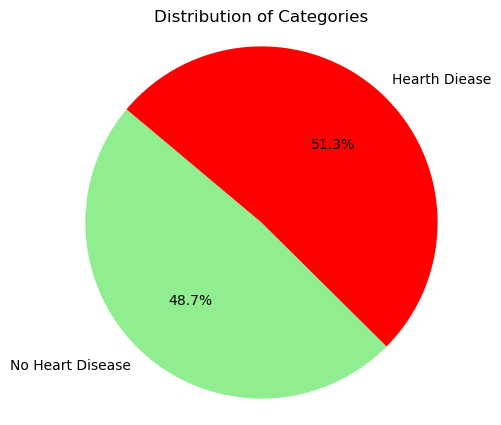

In [22]:
labels = ['No Heart Disease', 'Hearth Diease']
sizes = [num_patients_withno_heart_disease,num_patients_with_heart_disease]  # percentages or counts for each category

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'red'])
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()

In [23]:
#let's store this proccessed data into file
df.to_csv('df_output_file.csv', index=False)

# 6. Spliting Data Set into Training and Testing Data

In [24]:
#let's drop the target col from the data set and store into the separte variable 
#Droping from data set
X = df.drop(columns='target', axis=1)
#Store the Target Varibale value separtly 
Y = df['target']

print('below is the Data set without target variable',X)


below is the Data set without target variable       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0    

In [25]:
print('Below is the only the traget col value' , Y)

Below is the only the traget col value 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


### 6.1 : Splitting Data into the Training and Testing Data set

In [26]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20 , stratify=Y , random_state=2)
#in the above X is the independent Variable
# and Y is the dependent varibale

In [27]:
print("Total Data set row :"+ str(len(X)))
print("Trianing Data set :"+ str(len(X_train)))
print("Testing Data set :"+ str(len(X_test)))

Total Data set row :1025
Trianing Data set :820
Testing Data set :205


###  6.2 : Model Traning 
> We have multiple algorithms available for solving this classification problem, and for this particular task, we are opting to use logistic regression.

In [28]:
#let create the object of the Logistic regression 
model = LogisticRegression()

In [29]:
## then we will pass our training data into the Logistic regression model for traing model
model.fit(X_train , Y_train)

LogisticRegression()

## 7.  Model Evaluation

let's see how well our trained model predicts if someone has the disease or not.




In [30]:
#let check the accurcey for the traning and testing value
#training data
X_train_predication = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication , Y_train)

In [31]:
print("Accuracy of the Training data : " ,training_data_accuracy)

Accuracy of the Training data :  0.8524390243902439


In [32]:
#testing data
Y_train_predication = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_train_predication , Y_test)

In [33]:
print("Accuracy of the Testing data : " ,test_data_accuracy)

Accuracy of the Testing data :  0.8048780487804879


In [34]:
# Note: We need to ensure that the accuracy of the testing and training datasets doesn't have a significant difference.
# If the difference is too high, it could indicate overfitting.


In [40]:
Y_train_predication = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_train_predication)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[72 28]
 [12 93]]



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



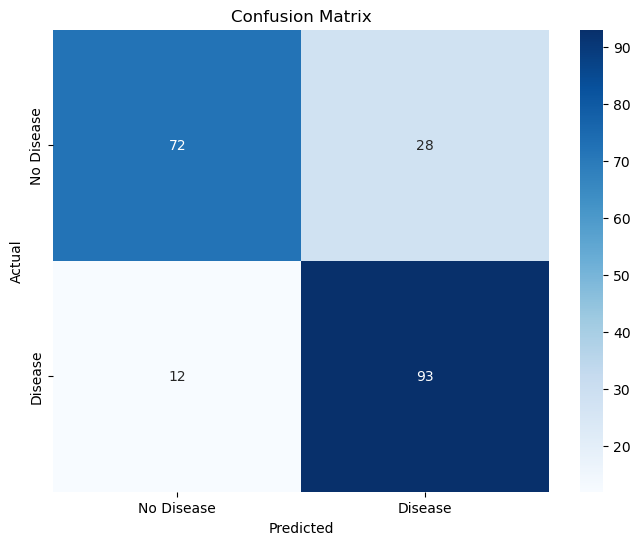

In [43]:
# Display classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_train_predication))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 8. Let's Predicat some Values for testing 

In [44]:
input_data = (65,0,2,140,417,1,0,157,0,0.8,2,1,2)
#change the input data into numpy array for better predication
input_data_as_numpy_array = np.asarray(input_data)
#let's reshape the numpy array as we are predicting for only one instance it mean preidct for the one row
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


#Please test this with Model which taken from the orginal data set
# 60,1,0,145,282,0,0,142,1,2.8,1,2,3    ---> 0  it mean no hearth diease
# 65,0,2,140,417,1,0,157,0,0.8,2,1,2  ---> 1 it mean has the hearth diease 


In [45]:
predication = model.predict(input_data_reshaped)

if(predication == 0):
    print("The Patinet does not have Hearth Disease")
else :
    print("The Patinet has the Hearth Disease")

The Patinet has the Hearth Disease
